## Importation des données

In [1]:
import pandas as pd
import numpy as np
import mysql.connector as mysqlpyth

df = pd.read_csv('vgsales.csv')
df=df.drop(['NA_Sales','EU_Sales','JP_Sales','Other_Sales'], axis=1)
print(df.head(5))
df.to_csv('ventes_jeux.csv')


   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   Global_Sales  
0         82.74  
1         40.24  
2         35.82  
3         33.00  
4         31.37  


## Traitement des valeurs manquantes

In [2]:
df.isnull().value_counts()
df.fillna(df.mode)

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37
...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.01


## Ecriture en base

In [3]:
class Connexion :
    
    __USER = 'root'
    __PWD = 'root'
    __HOST = 'localhost'
    __PORT = '8081'
    __DB = 'jeuxvideo'
    __cursor = None

    @classmethod
    def ouvrir_connexion(cls) :
        if cls.__cursor == None :
            cls.__bdd = mysqlpyth.connect(user = cls.__USER, password = cls.__PWD, host = cls.__HOST, port = cls.__PORT, database = cls.__DB, allow_local_infile = True)
            cls.__cursor = cls.__bdd.cursor()
    
    @classmethod
    def charger_bdd(cls):
        query1 =  "LOAD DATA LOCAL INFILE './Jeux.csv' INTO TABLE jeux FIELDS TERMINATED BY ',' ENCLOSED BY '\"' LINES TERMINATED BY '\\n' IGNORE 1 ROWS;"
        query2 = "LOAD DATA LOCAL INFILE './Genre.csv' INTO TABLE genre FIELDS TERMINATED BY ',' ENCLOSED BY '\"' LINES TERMINATED BY '\\n' IGNORE 1 ROWS;"
        query3 ="LOAD DATA LOCAL INFILE './Editeur.csv' INTO TABLE editeur FIELDS TERMINATED BY ',' ENCLOSED BY '\"' LINES TERMINATED BY '\\n' IGNORE 1 ROWS;"
        query4 = "LOAD DATA LOCAL INFILE 'Console.csv' INTO TABLE console FIELDS TERMINATED BY ',' ENCLOSED BY '\"' LINES TERMINATED BY '\\n' IGNORE 1 ROWS;"
        cls.__cursor.execute(query1)
        cls.__cursor.execute(query2)
        cls.__cursor.execute(query3)
        cls.__cursor.execute(query4)
        cls.__bdd.commit()
        
    @classmethod
    def fermer_connexion(cls):
        cls.__cursor.close()
        cls.__bdd.close()
        cls.__cursor = None



In [4]:
tab_1=df[['Name','Year','Global_Sales']]
df_publish=df['Publisher'].unique()
df_publish=pd.DataFrame(df_publish)
tab_2=df_publish
df_plat=df['Platform'].unique()
df_plat=pd.DataFrame(df_plat)
tab_3=df_plat
df_genre=df['Genre'].unique()
df_genre=pd.DataFrame(df_genre)
tab_4=df_genre

tab_1.index += 1
tab_2.index += 1
tab_3.index += 1
tab_4.index += 1

tab_1.to_csv('Jeux.csv')
tab_2.to_csv('Editeur.csv')
tab_3.to_csv('Console.csv')
tab_4.to_csv('Genre.csv')

Connexion.ouvrir_connexion()
Connexion.charger_bdd()
Connexion.fermer_connexion()


## Analyse statistique

In [5]:
import seaborn as sns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   Global_Sales  16598 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 907.8+ KB


In [6]:
obj_df = df.select_dtypes(include=['object']).copy()
print(obj_df.head())
print(obj_df.tail())

                       Name Platform         Genre Publisher
0                Wii Sports      Wii        Sports  Nintendo
1         Super Mario Bros.      NES      Platform  Nintendo
2            Mario Kart Wii      Wii        Racing  Nintendo
3         Wii Sports Resort      Wii        Sports  Nintendo
4  Pokemon Red/Pokemon Blue       GB  Role-Playing  Nintendo
                                                   Name Platform     Genre  \
16593                Woody Woodpecker in Crazy Castle 5      GBA  Platform   
16594                     Men in Black II: Alien Escape       GC   Shooter   
16595  SCORE International Baja 1000: The Official Game      PS2    Racing   
16596                                        Know How 2       DS    Puzzle   
16597                                  Spirits & Spells      GBA  Platform   

        Publisher  
16593       Kemco  
16594  Infogrames  
16595  Activision  
16596    7G//AMES  
16597     Wanadoo  


In [7]:
print('##############################')
print(' Classement du nombre de plateforme par jeu :',"\n",df[['Publisher']].value_counts())
print('##############################')
print(' Classement du nombre de jeux par plateforme :',"\n",df[['Platform']].value_counts())
print('##############################')
print(' Classement des genres :',"\n",df[['Genre']].value_counts())
print('##############################')
print(' Classement des éditeurs :',"\n",df[['Publisher']].value_counts())

##############################
 Classement du nombre de plateforme par jeu : 
 Publisher                   
Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Playmates                          1
Playmore                           1
Plenty                             1
Pony Canyon                        1
SCS Software                       1
Length: 578, dtype: int64
##############################
 Classement du nombre de jeux par plateforme : 
 Platform
DS          2163
PS2         2161
PS3         1329
Wii         1325
X360        1265
PSP         1213
PS          1196
PC           960
XB           824
GBA          822
GC           556
3DS          509
PSV          413
PS4          336
N64          319
SNES         239
XOne         213
SAT          173
WiiU         143
2600         133
NES           98
GB           

Les données précédentes montrent :
- le nombre de plateforme par jeux (Need for Speed : Most Wanted est sorti sur un maximum de plateforme)
- le nombre de jeux par plateforme (la Nintendo DS est en tête)
- le nombre de jeux par catégorie (les jeux d'action sont les plus nombreux
- le nombre de jeux par éditeur (EA est en tête, Ubisoft est bien situé en 4ème position)

Nous allons visualiser sur des diagrammes circulaires les grandes tendances énoncés précédemment.

([<matplotlib.patches.Wedge at 0x27c1682daf0>,
 [Text(0.7284615972984712, 0.8242230894978375, 'Electronic Arts'),
  Text(-0.7372045521181685, 0.8164125478802068, 'Activision'),
  Text(-1.0297821885660117, -0.38671519767419993, 'Namco Bandai Games'),
  Text(-0.05480316124034704, -1.0986339761349386, 'Ubisoft'),
  Text(0.953717977239218, -0.5481076718043039, 'Konami Digital Entertainment')])

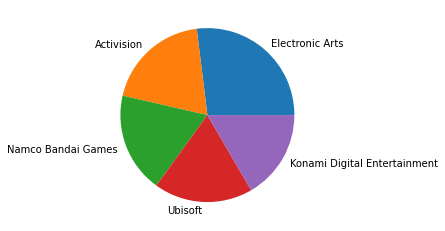

In [8]:
from matplotlib.pyplot import pie
pie(df[['Publisher']].value_counts().head(5), labels=['Electronic Arts', 'Activision','Namco Bandai Games','Ubisoft','Konami Digital Entertainment'])

Ci-dessous la répartition des jeux par genre. Une forte tendence action est montrée.

([<matplotlib.patches.Wedge at 0x27c168b58e0>,
 [Text(0.574365544083538, 0.9381387007098798, 'Action'),
  Text(-1.0231129888626935, 0.4040294692475367, 'Sport'),
  Text(-0.6990023656122846, -0.8493501591619502, 'Misc'),
  Text(0.3307539900451367, -1.0490957049141045, 'Role Playing'),
  Text(1.0116536212702796, -0.4319223895223885, 'Shooter')])

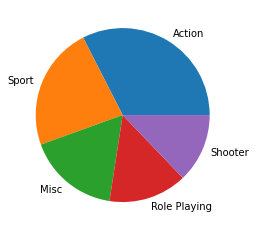

In [9]:
pie(df[['Genre']].value_counts().head(5), labels=['Action', 'Sport','Misc','Role Playing','Shooter'])

([<matplotlib.patches.Wedge at 0x27c169039a0>,
 [Text(0.7469232027132411, 0.8075306367244495, 'Nintendo DS'),
  Text(-0.8627151652639182, 0.6824386738921311, 'PS2'),
  Text(-0.8684068459916735, -0.6751811237251779, 'PS3'),
  Text(0.11153397460710211, -1.094330924587413, 'Wii'),
  Text(0.974615338325221, -0.5100244526502777, 'Xbox 360')])

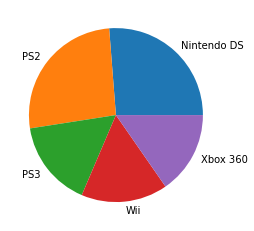

In [10]:
from matplotlib.pyplot import pie
pie(df[['Platform']].value_counts().head(5), labels=['Nintendo DS', 'PS2','PS3','Wii','Xbox 360'])

In [11]:
vente_max =df [['Global_Sales','Publisher','Name','Platform']].sort_values(ascending=False, by='Global_Sales')
pd.DataFrame(vente_max).head(15)

,Global_Sales,Publisher,Name,Platform
0,82.74,Nintendo,Wii Sports,Wii
1,40.24,Nintendo,Super Mario Bros.,NES
2,35.82,Nintendo,Mario Kart Wii,Wii
3,33.00,Nintendo,Wii Sports Resort,Wii
4,31.37,Nintendo,Pokemon Red/Pokemon Blue,GB
5,30.26,Nintendo,Tetris,GB
6,30.01,Nintendo,New Super Mario Bros.,DS
7,29.02,Nintendo,Wii Play,Wii
8,28.62,Nintendo,New Super Mario Bros. Wii,Wii
9,28.31,Nintendo,Duck Hunt,NES


Nous allons analyser plus en détails la société Ubisoft.

In [12]:
df_ubisoft = df.loc[df['Publisher'] == 'Ubisoft']
print(df_ubisoft.sort_values(ascending=False, by='Global_Sales').head(15))

     Rank                             Name Platform    Year      Genre  \
60     61                     Just Dance 3      Wii  2011.0       Misc   
68     69                     Just Dance 2      Wii  2010.0       Misc   
102   103                       Just Dance      Wii  2009.0       Misc   
111   112                     Just Dance 4      Wii  2012.0       Misc   
128   129             Assassin's Creed III      PS3  2012.0     Action   
156   157              Assassin's Creed II      PS3  2009.0     Action   
158   159                 Assassin's Creed     X360  2007.0  Adventure   
172   173             Assassin's Creed III     X360  2012.0     Action   
176   177              Assassin's Creed II     X360  2009.0     Action   
218   219                 Assassin's Creed      PS3  2007.0  Adventure   
247   248  Michael Jackson: The Experience      Wii  2010.0       Misc   
263   264    Assassin's Creed: Revelations      PS3  2011.0     Action   
273   274    Assassin's Creed: Revelat

On peut voir que Just Dance et Assasin's Creed sont les deux licences les plus vendues d'Ubisoft.

In [13]:
c=df_ubisoft.sort_values(ascending=False, by='Global_Sales').head(10)
x=c.Name
y=c.Global_Sales

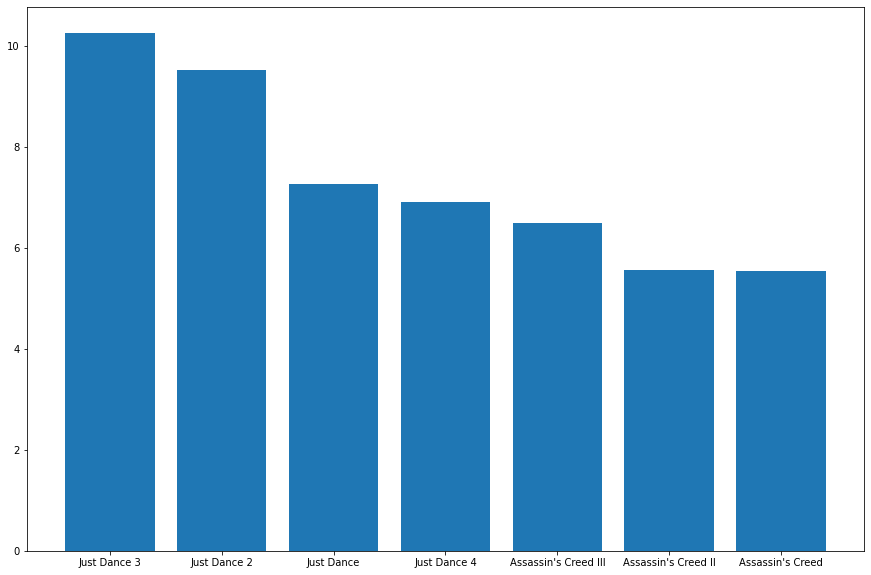

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
plt.bar(x, y)
plt.ylabel = 'Ventes'
plt.xlabel = x

In [21]:
df[['Publisher']].value_counts()
df[['Global_Sales','Publisher']]

,Global_Sales,Publisher
0,82.74,Nintendo
1,40.24,Nintendo
2,35.82,Nintendo
3,33.00,Nintendo
4,31.37,Nintendo
...,...,...
16593,0.01,Kemco
16594,0.01,Infogrames
16595,0.01,Activision
16596,0.01,7G//AMES
